In [ ]:
## Import libraries
# We are going to import pandas, a data processing and CSV file I/O library
import pandas as pd
# We also import matplotlib, which is a go-to Python plotting library
import matplotlib.pyplot as plt
# We are also going to import seaborn which is a powerful Python graphing library based on matplotlib optimizes matplotlib's output
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/m155/DataMining/main/smoking.csv'
df = pd.read_csv(url)

In [ ]:
df.columns

Index(['gender', 'age', 'height(cm)', 'waist(cm)', 'systolic', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
       'hemoglobin', 'serum creatinine', 'AST', 'Gtp', 'oral', 'smoking'],
      dtype='object')

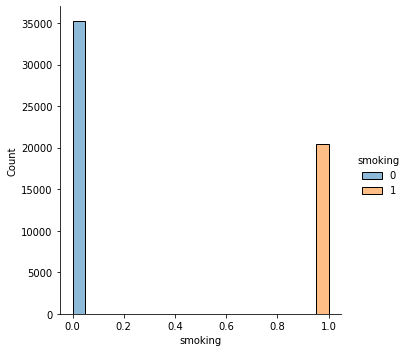

In [ ]:
sns.displot(df, x="smoking", hue="smoking")

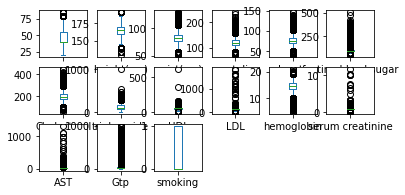

In [ ]:
df.plot(kind = 'box', subplots = True, layout = (4,6), sharex = False, sharey = False)
plt.show()

In [ ]:
df.head()

,gender,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,Gtp,oral,smoking
0,F,40,155,81.3,114,73,94,215,82,73,126,12.9,0.7,18,27,Y,0
1,F,40,160,81.0,119,70,130,192,115,42,127,12.7,0.6,22,18,Y,0
2,M,55,170,80.0,138,86,89,242,182,55,151,15.8,1.0,21,22,Y,1
3,M,40,165,88.0,100,60,96,322,254,45,226,14.7,1.0,19,18,Y,0
4,F,40,155,86.0,120,74,80,184,74,62,107,12.5,0.6,16,22,Y,0


In [ ]:
NAs = pd.concat([df.isnull().sum()], axis=1, keys=["df"])
NAs[NAs.sum(axis=1)>0]

,df


In [ ]:
for col in df.dtypes[df.dtypes == "object"].index:
  for_dummy = df.pop(col)
  df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)
df.head()

,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,Gtp,smoking,gender_F,gender_M,oral_Y
0,40,155,81.3,114,73,94,215,82,73,126,12.9,0.7,18,27,0,1,0,1
1,40,160,81.0,119,70,130,192,115,42,127,12.7,0.6,22,18,0,1,0,1
2,55,170,80.0,138,86,89,242,182,55,151,15.8,1.0,21,22,1,0,1,1
3,40,165,88.0,100,60,96,322,254,45,226,14.7,1.0,19,18,0,0,1,1
4,40,155,86.0,120,74,80,184,74,62,107,12.5,0.6,16,22,0,1,0,1


In [ ]:
labels = df.pop("smoking")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.25)

In [ ]:
print(x_train.shape)

(41769, 17)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
print("Accuracy Score For RandomForest :",roc_auc*100)

Accuracy Score For RandomForest : 81.2539334461689


In [ ]:
from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

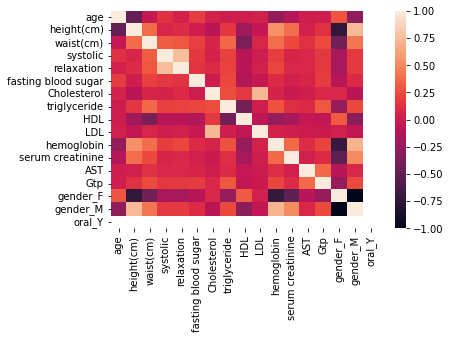

In [ ]:
sns.heatmap(x_train.corr())

# New Section

Text(0.5, 0, 'Feature Importance')

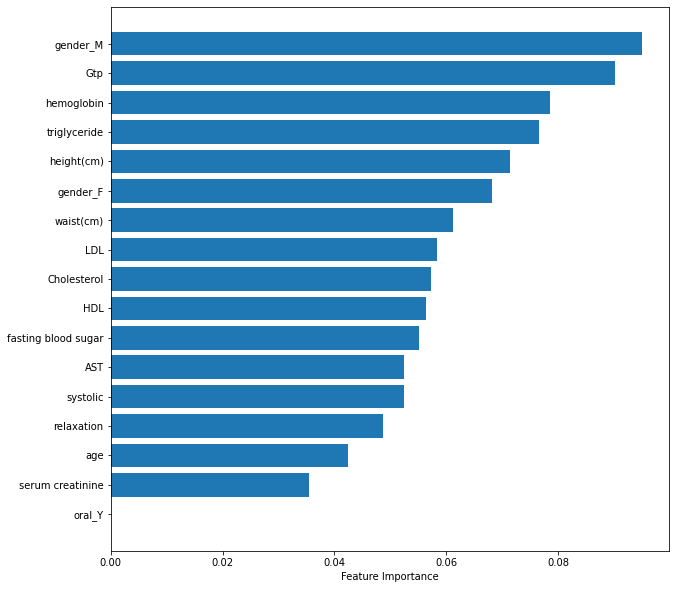

In [ ]:
#feature_importances
plt.figure(figsize=(10,10))
sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print("Score the X-train with Y-train is : ", dt.score(x_train,y_train))
print("Score the X-test  with Y-test  is : ", dt.score(x_test,y_test))
print("Accuracy Score for decision tree :",accuracy_score(y_test,y_pred)*100)




Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.7783523665876607
Accuracy Score for decision tree : 77.83523665876608


In [ ]:
x_train.corr()

,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,Gtp,gender_F,gender_M,oral_Y
age,1.000000,-0.478552,-0.026267,0.133843,0.050361,0.179958,0.057454,0.013975,0.008554,0.045729,-0.262247,-0.105481,0.029964,0.016193,0.288201,-0.288201,NaN
height(cm),-0.478552,1.000000,0.379523,0.076607,0.109340,0.021893,-0.079572,0.157277,-0.216029,-0.045107,0.543053,0.384900,0.040173,0.140304,-0.742120,0.742120,NaN
waist(cm),-0.026267,0.379523,1.000000,0.320172,0.293175,0.210626,0.068892,0.362212,-0.372875,0.074025,0.390423,0.237532,0.138561,0.245123,-0.421047,0.421047,NaN
systolic,0.133843,0.076607,0.320172,1.000000,0.760416,0.171211,0.061220,0.199142,-0.089081,0.017514,0.188628,0.068778,0.080699,0.164282,-0.166862,0.166862,NaN
relaxation,0.050361,0.109340,0.293175,0.760416,1.000000,0.145561,0.097320,0.213193,-0.088154,0.042376,0.233675,0.081421,0.083409,0.174607,-0.175963,0.175963,NaN
fasting blood sugar,0.179958,0.021893,0.210626,0.171211,0.145561,1.000000,0.011536,0.229223,-0.121614,-0.016472,0.100033,0.045276,0.064596,0.183536,-0.099585,0.099585,NaN
Cholesterol,0.057454,-0.079572,0.068892,0.061220,0.097320,0.011536,1.000000,0.250206,0.164828,0.731579,0.059374,-0.004784,0.027006,0.082188,0.084176,-0.084176,NaN
triglyceride,0.013975,0.157277,0.362212,0.199142,0.213193,0.229223,0.250206,1.000000,-0.410992,0.026625,0.273460,0.122442,0.097362,0.297053,-0.240216,0.240216,NaN
HDL,0.008554,-0.216029,-0.372875,-0.089081,-0.088154,-0.121614,0.164828,-0.410992,1.000000,-0.056146,-0.244166,-0.174594,-0.035459,-0.053500,0.305954,-0.305954,NaN
LDL,0.045729,-0.045107,0.074025,0.017514,0.042376,-0.016472,0.731579,0.026625,-0.056146,1.000000,0.052191,0.025374,0.001691,-0.007132,0.039698,-0.039698,NaN


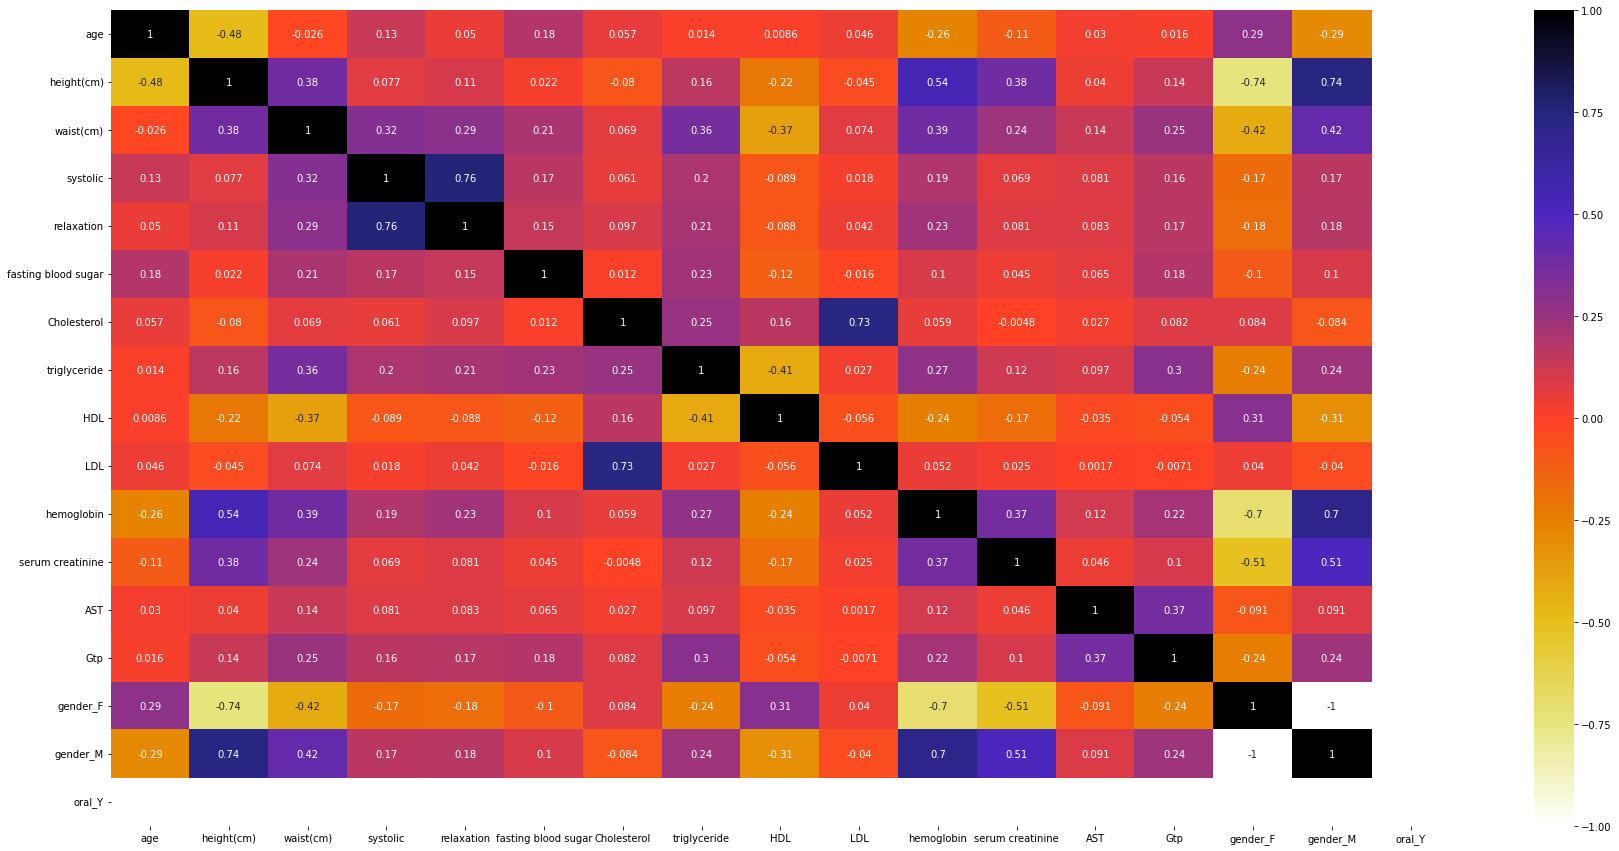

In [ ]:
from typing import Tuple
import seaborn as sns
# Using Pearson Correlation
plt.figure(figsize=(30,15))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

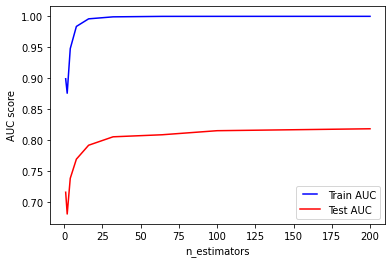

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
  df = RandomForestClassifier(n_estimators=estimator, n_jobs=1)
  df.fit(x_train, y_train)
  train_pred = df.predict(x_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = df.predict(x_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label = "Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label = "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()



[Text(0.3323155537725114, 0.984375, 'X[13] <= 25.5\ngini = 0.464\nsamples = 26387\nvalue = [26509, 15260]'),
 Text(0.1520025342388884, 0.953125, 'X[0] <= 37.5\ngini = 0.331\nsamples = 13311\nvalue = [16624, 4412]'),
 Text(0.05489958981764925, 0.921875, 'X[7] <= 75.5\ngini = 0.478\nsamples = 2847\nvalue = [2688, 1764]'),
 Text(0.018197441107001895, 0.890625, 'X[2] <= 71.35\ngini = 0.457\nsamples = 1119\nvalue = [1142, 623]'),
 Text(0.0023184262050532987, 0.859375, 'X[9] <= 58.5\ngini = 0.5\nsamples = 158\nvalue = [124, 122]'),
 Text(0.0005966995058582218, 0.828125, 'X[7] <= 74.0\ngini = 0.346\nsamples = 17\nvalue = [21, 6]'),
 Text(0.0003977996705721478, 0.796875, 'X[4] <= 67.5\ngini = 0.269\nsamples = 16\nvalue = [21, 4]'),
 Text(0.0001988998352860739, 0.765625, 'gini = 0.0\nsamples = 8\nvalue = [13, 0]'),
 Text(0.0005966995058582218, 0.765625, 'X[5] <= 94.5\ngini = 0.444\nsamples = 8\nvalue = [8, 4]'),
 Text(0.0003977996705721478, 0.734375, 'X[10] <= 15.2\ngini = 0.198\nsamples = 5\nv

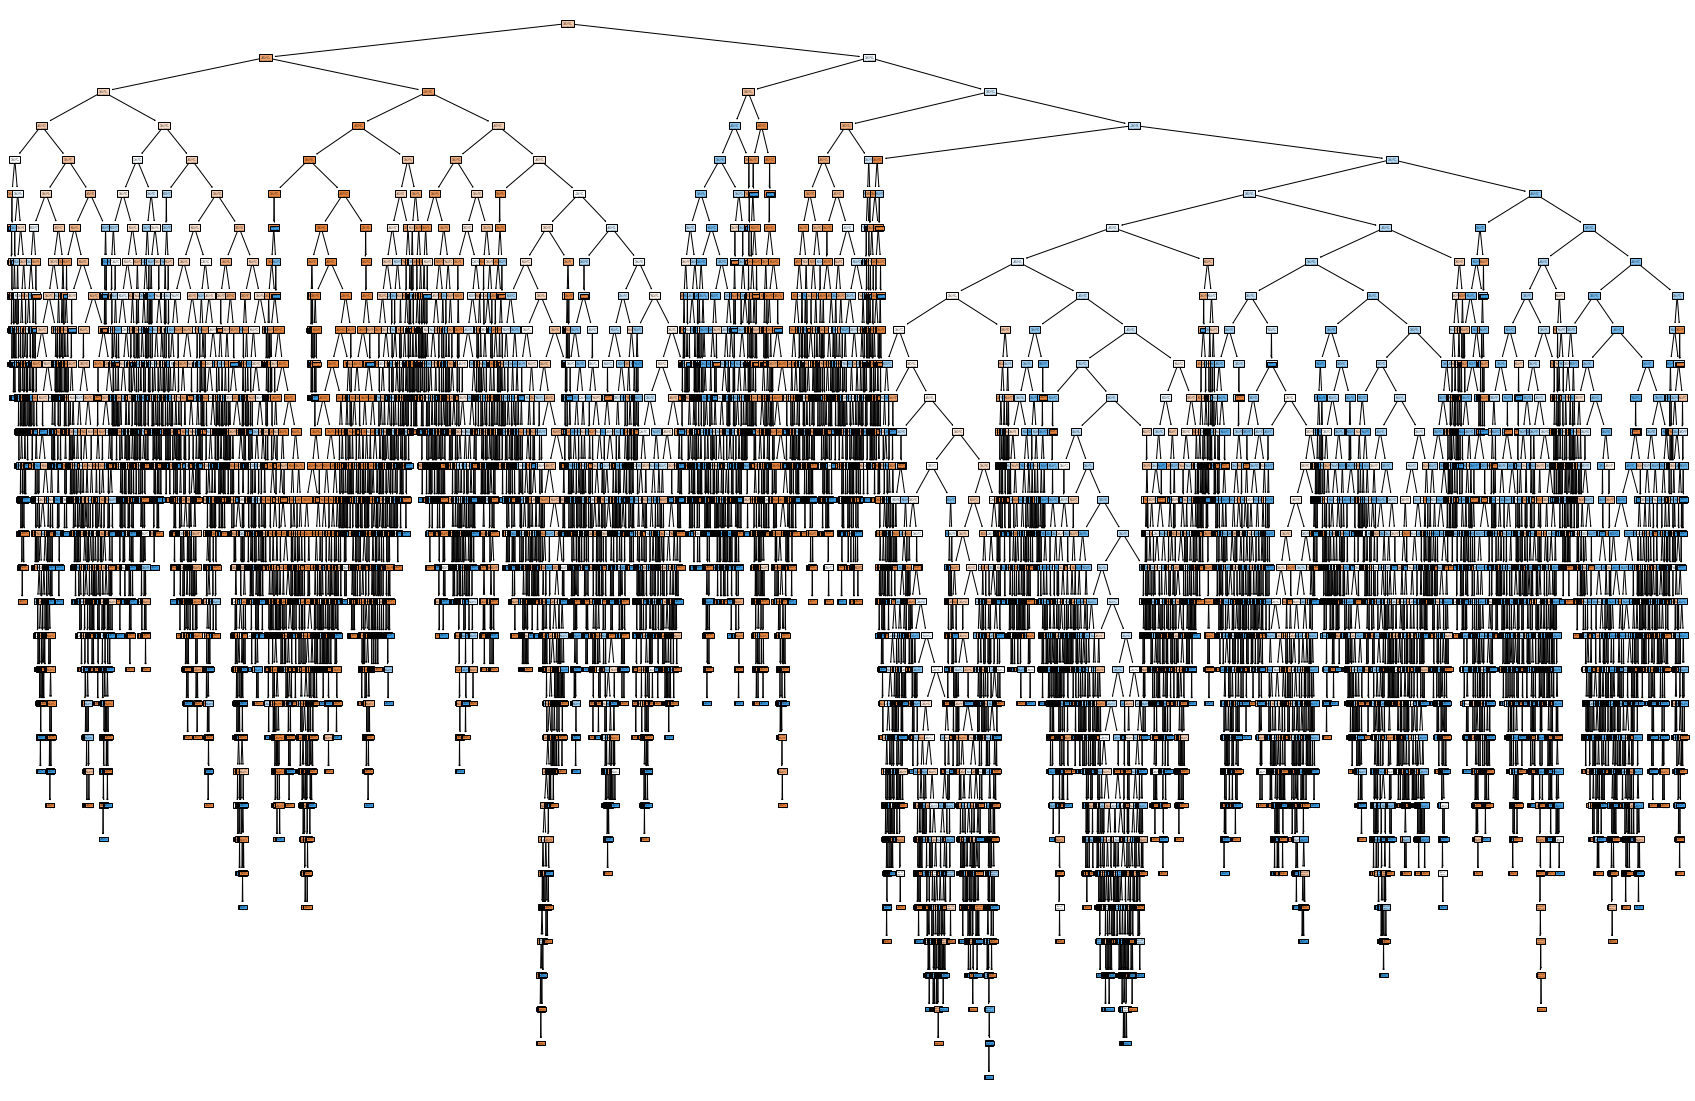

In [ ]:
from sklearn import tree
df.estimators_
plt.figure(figsize=(30,20))
tree.plot_tree(df.estimators_[2], filled=True)